**1. Importing Libries and Dataset**

In [ ]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data_yelp = pd.read_csv("/content/yelp_labelled.txt",sep="\t",header = None)

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


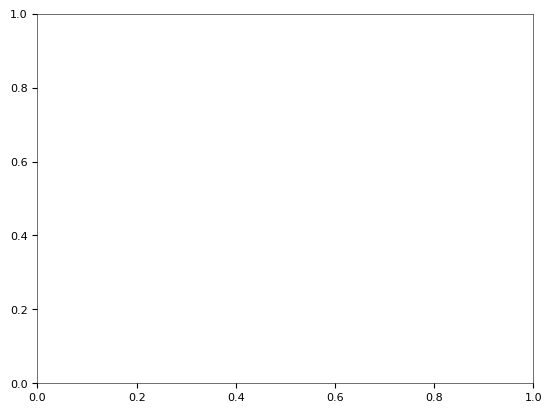

In [ ]:
data_yelp.head()

In [ ]:
column_name=["Review","Sentiment"]
data_yelp.columns=column_name

In [ ]:
data_yelp.head(), data_yelp.shape

(                                              Review  Sentiment
 0                           Wow... Loved this place.          1
 1                                 Crust is not good.          0
 2          Not tasty and the texture was just nasty.          0
 3  Stopped by during the late May bank holiday of...          1
 4  The selection on the menu was great and so wer...          1,
 (1000, 2))

In [ ]:
data_amazon = pd.read_csv("/content/amazon_cells_labelled.txt",sep="\t",header=None)

In [ ]:
data_amazon.columns=column_name

In [ ]:
data_amazon.head(),data_amazon.shape


(                                              Review  Sentiment
 0  So there is no way for me to plug it in here i...          0
 1                        Good case, Excellent value.          1
 2                             Great for the jawbone.          1
 3  Tied to charger for conversations lasting more...          0
 4                                  The mic is great.          1,
 (1000, 2))

In [ ]:
data_imdb=pd.read_csv("/content/imdb_labelled.txt",sep="\t",header=None)

In [ ]:
data_imdb.columns=column_name

In [ ]:
data_imdb.head(),data_imdb.shape

(                                              Review  Sentiment
 0  A very, very, very slow-moving, aimless movie ...          0
 1  Not sure who was more lost - the flat characte...          0
 2  Attempting artiness with black & white and cle...          0
 3       Very little music or anything to speak of.            0
 4  The best scene in the movie was when Gerardo i...          1,
 (748, 2))

1.1 Append all dataset in single dataframe

In [ ]:
data = data_yelp.append([data_amazon,data_imdb], ignore_index=True)

<ipython-input-14-fd671dee36c7>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data_yelp.append([data_amazon,data_imdb], ignore_index=True)


In [ ]:
data.shape

(2748, 2)

In [ ]:
data.head()

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
 data["Sentiment"].value_counts()

1    1386
0    1362
Name: Sentiment, dtype: int64

In [ ]:
data.isnull().sum()

Review       0
Sentiment    0
dtype: int64

In [ ]:
x=data["Review"]
y=data["Sentiment"]

**2. Data Cleaning :**
in this we'll remove stop word and punctuation then we'll apply lemmatization

In [ ]:
import string


In [ ]:
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
stopwords = list(STOP_WORDS)

In [ ]:
import spacy

In [ ]:
nlp=spacy.load("en_core_web_sm")

In [ ]:
def text_data_cleaning (sentence):
  doc=nlp(sentence)
  tokens=[]
  for token in doc:
    if token.lemma_ != "-PRON-":
      temp=token.lemma_.lower().strip()
    else:
      temp=token.lower_
    tokens.append(temp)
  cleaned_tokens=[]
  for token in  tokens:
    if token not in stopwords and token not in punct:
      cleaned_tokens.append(token)
  return cleaned_tokens

In [ ]:
text_data_cleaning("Hello all, It's beautiful day outside!")

['hello', 'beautiful', 'day', 'outside']

**3. Vectorization Feature Engineering**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [ ]:
tfidf=TfidfVectorizer(tokenizer=text_data_cleaning)

In [ ]:
classifier = LinearSVC()

**4. Training the Model**

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.head(),x_train.shape,x_test.shape

(2572    An Italian reviewer called this "a small, grea...
 526                          And it was way to expensive.
 1509    As an earlier review noted, plug in this charg...
 144     Nice blanket of moz over top but i feel like t...
 2483    The film gives meaning to the phrase, "Never i...
 Name: Review, dtype: object,
 (2198,),
 (550,))

Fit x_train and y_train

In [ ]:
clf=Pipeline([("tfidf",tfidf),("clf",classifier)])

In [ ]:
clf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x7a36b998b2e0>)),
                ('clf', LinearSVC())])

**5. Predict the test set results**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7672727272727272

In [ ]:
confusion_matrix(y_test,y_pred)

array([[201,  78],
       [ 50, 221]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       279
           1       0.74      0.82      0.78       271

    accuracy                           0.77       550
   macro avg       0.77      0.77      0.77       550
weighted avg       0.77      0.77      0.77       550



In [ ]:
clf.predict(["I bought this for my husband who plays the piano.  He is having a wonderful time playing these old hymns.  The music  is at times hard to read because we think the book was published for singing from more than playing from.  Great purchase though!"])

array([1])

In [ ]:
clf.predict(["The bags are defective. No perforation between two bags. Bags of low quality. Gets torn when u try to open it up"])

array([0])

In [ ]:
clf.predict(["Bags are bit thin and easily torn if you put little weight. Won't prefer next time."])

array([0])